In [118]:
# data
import pandas as pd
import numpy as np
from datetime import datetime
from math import ceil

# plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# processing
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.base import clone

# clustering models
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples

# multidimensional visualization methods
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

### Data Exploration
- view the original dataset
- outliers
- null values

In [119]:
# read the dataset
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx')
df.Custid.fillna(11001.0, inplace=True)
df.set_index('Custid', inplace = True)

In [120]:
# create a copy of the original df for preprocessing
df_backup = df.copy()

In [50]:
# first rows - view the structure
df.tail()

Dayswus      Age      Edu     Income     Freq   Recency   Monetary  \
Custid                                                                         
4070.0    596.000  66.0000  15.0000  84714.000  18.0000   45.0000   720.0000   
7909.0    619.000  18.0000  12.0000  40466.000   3.0000   65.0000    47.0000   
4158.0   1107.000  33.0000  16.0000  53661.000   1.0000  368.0000    15.0000   
4914.0    979.000  55.0000  16.0000  94926.000  25.0000   28.0000  1148.0000   
11001.0   898.102  47.9273  16.7391  69904.358  14.6281   62.4068   622.5552   

              LTV  Perdeal   Dryred  Sweetred    Drywh  Sweetwh  Dessert  \
Custid                                                                     
4070.0   391.0000   5.0000  30.0000   12.0000  36.0000  10.0000  12.0000   
7909.0     5.0000  23.0000   6.0000   24.0000  10.0000  38.0000  22.0000   
4158.0     2.0000  35.0000  18.0000   13.0000  45.0000  11.0000  13.0000   
4914.0   293.0000   7.0000  63.0000   10.0000  13.0000  11.0000   3.0000   
11001.0  209.0712  32.3972  50.3827    7.0545  28.5213   7.0698   6.9474   

          Exotic  WebPurchase  WebVisit  
Custid                                   
4070.0   13.0000      18.0000    2.0000  
7909.0   41.0000      58.0000    5.0000  
4158.0   13.0000      60.0000    6.0000  
4914.0    4.0000      34.0000    5.0000  
11001.0  16.5466      42.3762    5.2166

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10001 entries, 5325.0 to nan
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dayswus      10001 non-null  float64
 1   Age          10001 non-null  float64
 2   Edu          10001 non-null  float64
 3   Income       10001 non-null  float64
 4   Freq         10001 non-null  float64
 5   Recency      10001 non-null  float64
 6   Monetary     10001 non-null  float64
 7   LTV          10001 non-null  float64
 8   Perdeal      10001 non-null  float64
 9   Dryred       10001 non-null  float64
 10  Sweetred     10001 non-null  float64
 11  Drywh        10001 non-null  float64
 12  Sweetwh      10001 non-null  float64
 13  Dessert      10001 non-null  float64
 14  Exotic       10001 non-null  float64
 15  WebPurchase  10001 non-null  float64
 16  WebVisit     10001 non-null  float64
dtypes: float64(17)
memory usage: 1.4 MB


In [13]:
# the dataset has null values - how to correct them?
df.isna().sum()

Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [47]:
df.describe().T

count        mean           std      min      25%      50%  \
Dayswus      10001.0    898.1020    202.482664    550.0    724.0    894.0   
Edu          10001.0     16.7391      1.876281     12.0     15.0     17.0   
Income       10001.0  69904.3580  27610.852665  10000.0  47646.0  70009.0   
Freq         10001.0     14.6281     11.968475      1.0      4.0     12.0   
Recency      10001.0     62.4068     69.870762      0.0     26.0     52.0   
Monetary     10001.0    622.5552    647.102966      6.0     63.0    383.0   
LTV          10001.0    209.0712    291.971441   -178.0     -2.0     57.0   
Perdeal      10001.0     32.3972     27.895699      0.0      6.0     25.0   
Dryred       10001.0     50.3827     23.452643      1.0     32.0     51.0   
Sweetred     10001.0      7.0545      7.866151      0.0      2.0      4.0   
Drywh        10001.0     28.5213     12.583328      1.0     19.0     28.0   
Sweetwh      10001.0      7.0698      8.014682      0.0      2.0      4.0   
Dessert      10001.0      6.9474      7.879152      0.0      2.0      4.0   
Exotic       10001.0     16.5466     17.246809      0.0      4.0     10.0   
WebPurchase  10001.0     42.3762     18.521136      4.0     28.0     45.0   
WebVisit     10001.0      5.2166      2.330340      0.0      3.0      6.0   

                 75%       max  
Dayswus       1074.0    1250.0  
Edu             18.0      20.0  
Income       92147.0  140628.0  
Freq            24.0      56.0  
Recency         78.0     549.0  
Monetary      1077.0    3052.0  
LTV            364.0    1791.0  
Perdeal         56.0      97.0  
Dryred          69.0      99.0  
Sweetred        10.0      75.0  
Drywh           37.0      74.0  
Sweetwh         10.0      62.0  
Dessert          9.0      77.0  
Exotic          23.0      96.0  
WebPurchase     57.0      88.0  
WebVisit         7.0      10.0

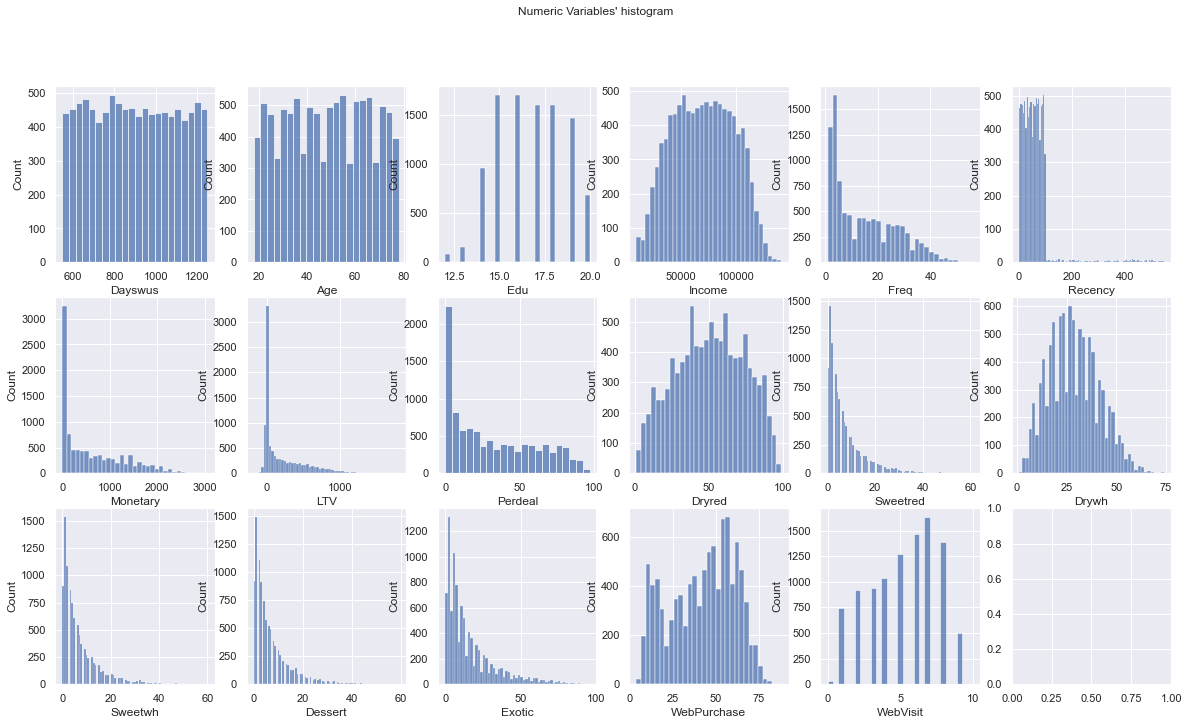

In [82]:
# plot outliers
%matplotlib inline
num_vars=df.select_dtypes(include=np.number).set_index(df.index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_vars): # Notice the zip() function and flatten() method
    sns.histplot(x=num_vars[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' histogram"

plt.suptitle(title)

plt.show()


### Outliers

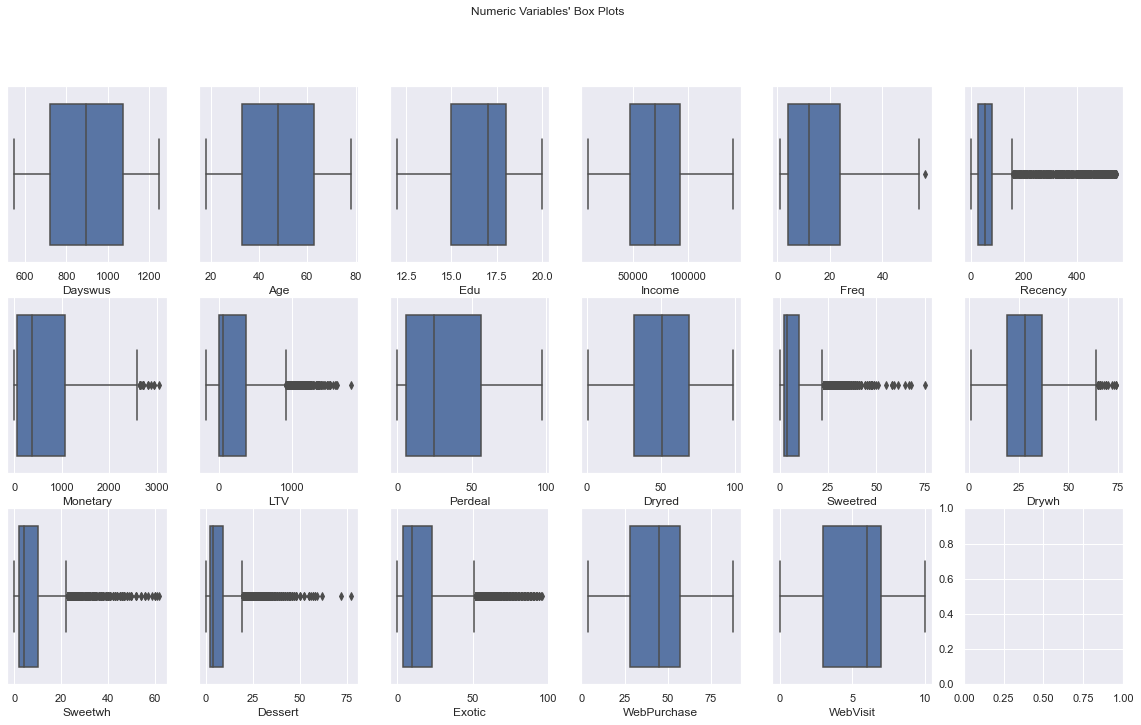

In [51]:
# plot outliers
%matplotlib inline
num_vars=df.select_dtypes(include=np.number).set_index(df.index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_vars): # Notice the zip() function and flatten() method
    sns.boxplot(x=num_vars[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## DBscan

In [121]:
# Robust Scaler - Scale features using statistics that are robust to outliers.
robust = RobustScaler().fit(df)
df_norm = robust.transform(df)

# Convert the array to a pandas dataframe
df_norm = pd.DataFrame(df_norm, columns=df.columns).set_index(df.index)

In [122]:
df_norm.describe().T

count      mean       std       min       25%  50%       75%  \
Dayswus      10001.0  0.011720  0.578522 -0.982857 -0.485714  0.0  0.514286   
Age          10001.0 -0.002423  0.576729 -1.000000 -0.500000  0.0  0.500000   
Edu          10001.0 -0.086967  0.625427 -1.666667 -0.666667  0.0  0.333333   
Income       10001.0 -0.002351  0.620455 -1.348487 -0.502528  0.0  0.497472   
Freq         10001.0  0.131405  0.598424 -0.550000 -0.400000  0.0  0.600000   
Recency      10001.0  0.200131  1.343668 -1.000000 -0.500000  0.0  0.500000   
Monetary     10001.0  0.236248  0.638169 -0.371795 -0.315582  0.0  0.684418   
LTV          10001.0  0.415495  0.797736 -0.642077 -0.161202  0.0  0.838798   
Perdeal      10001.0  0.147944  0.557914 -0.500000 -0.380000  0.0  0.620000   
Dryred       10001.0 -0.016684  0.633855 -1.351351 -0.513514  0.0  0.486486   
Sweetred     10001.0  0.381812  0.983269 -0.500000 -0.250000  0.0  0.750000   
Drywh        10001.0  0.028961  0.699074 -1.500000 -0.500000  0.0  0.500000   
Sweetwh      10001.0  0.383725  1.001835 -0.500000 -0.250000  0.0  0.750000   
Dessert      10001.0  0.421057  1.125593 -0.571429 -0.285714  0.0  0.714286   
Exotic       10001.0  0.344558  0.907727 -0.526316 -0.315789  0.0  0.684211   
WebPurchase  10001.0 -0.090476  0.638660 -1.413793 -0.586207  0.0  0.413793   
WebVisit     10001.0 -0.195850  0.582585 -1.500000 -0.750000  0.0  0.250000   

                   max  
Dayswus       1.017143  
Age           1.000000  
Edu           1.000000  
Income        1.586908  
Freq          2.200000  
Recency       9.557692  
Monetary      2.632150  
LTV           4.737705  
Perdeal       1.440000  
Dryred        1.297297  
Sweetred      8.875000  
Drywh         2.555556  
Sweetwh       7.250000  
Dessert      10.428571  
Exotic        4.526316  
WebPurchase   1.482759  
WebVisit      1.000000

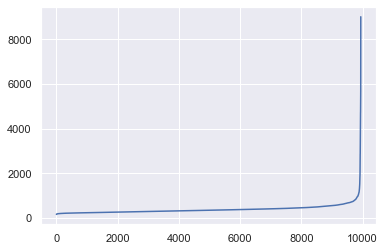

In [69]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_norm)
distances, _ = neigh.kneighbors(df_norm)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [123]:
dbscan = DBSCAN(eps=2.7, min_samples=20, n_jobs=6)
dbscan_labels = dbscan.fit_predict(df_norm)
Counter(dbscan_labels)

Counter({0: 9941, -1: 60})

In [124]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers
df = df[dbscan_labels!=-1]\
    .copy()

# New df without outliers
df_norm = df_norm[dbscan_labels!=-1]\
    .copy()

In [125]:
df=df.reset_index(drop=True)

In [126]:
df_norm=df_norm.reset_index(drop=True)

## Feature selection: Correlation matrix

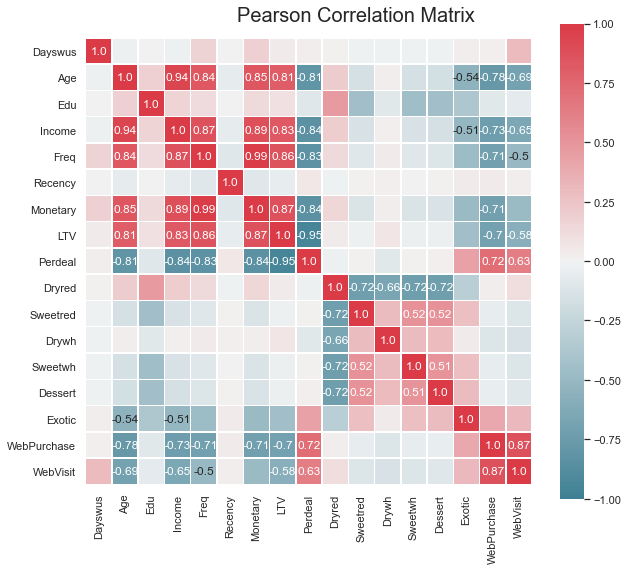

In [79]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df.corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [39]:
# age or income 
#df.drop('Age',inplace=True,axis=1)

# do not use monetary and recency 
#list of possible variables:

#LTV, WebVisit, frequency

#

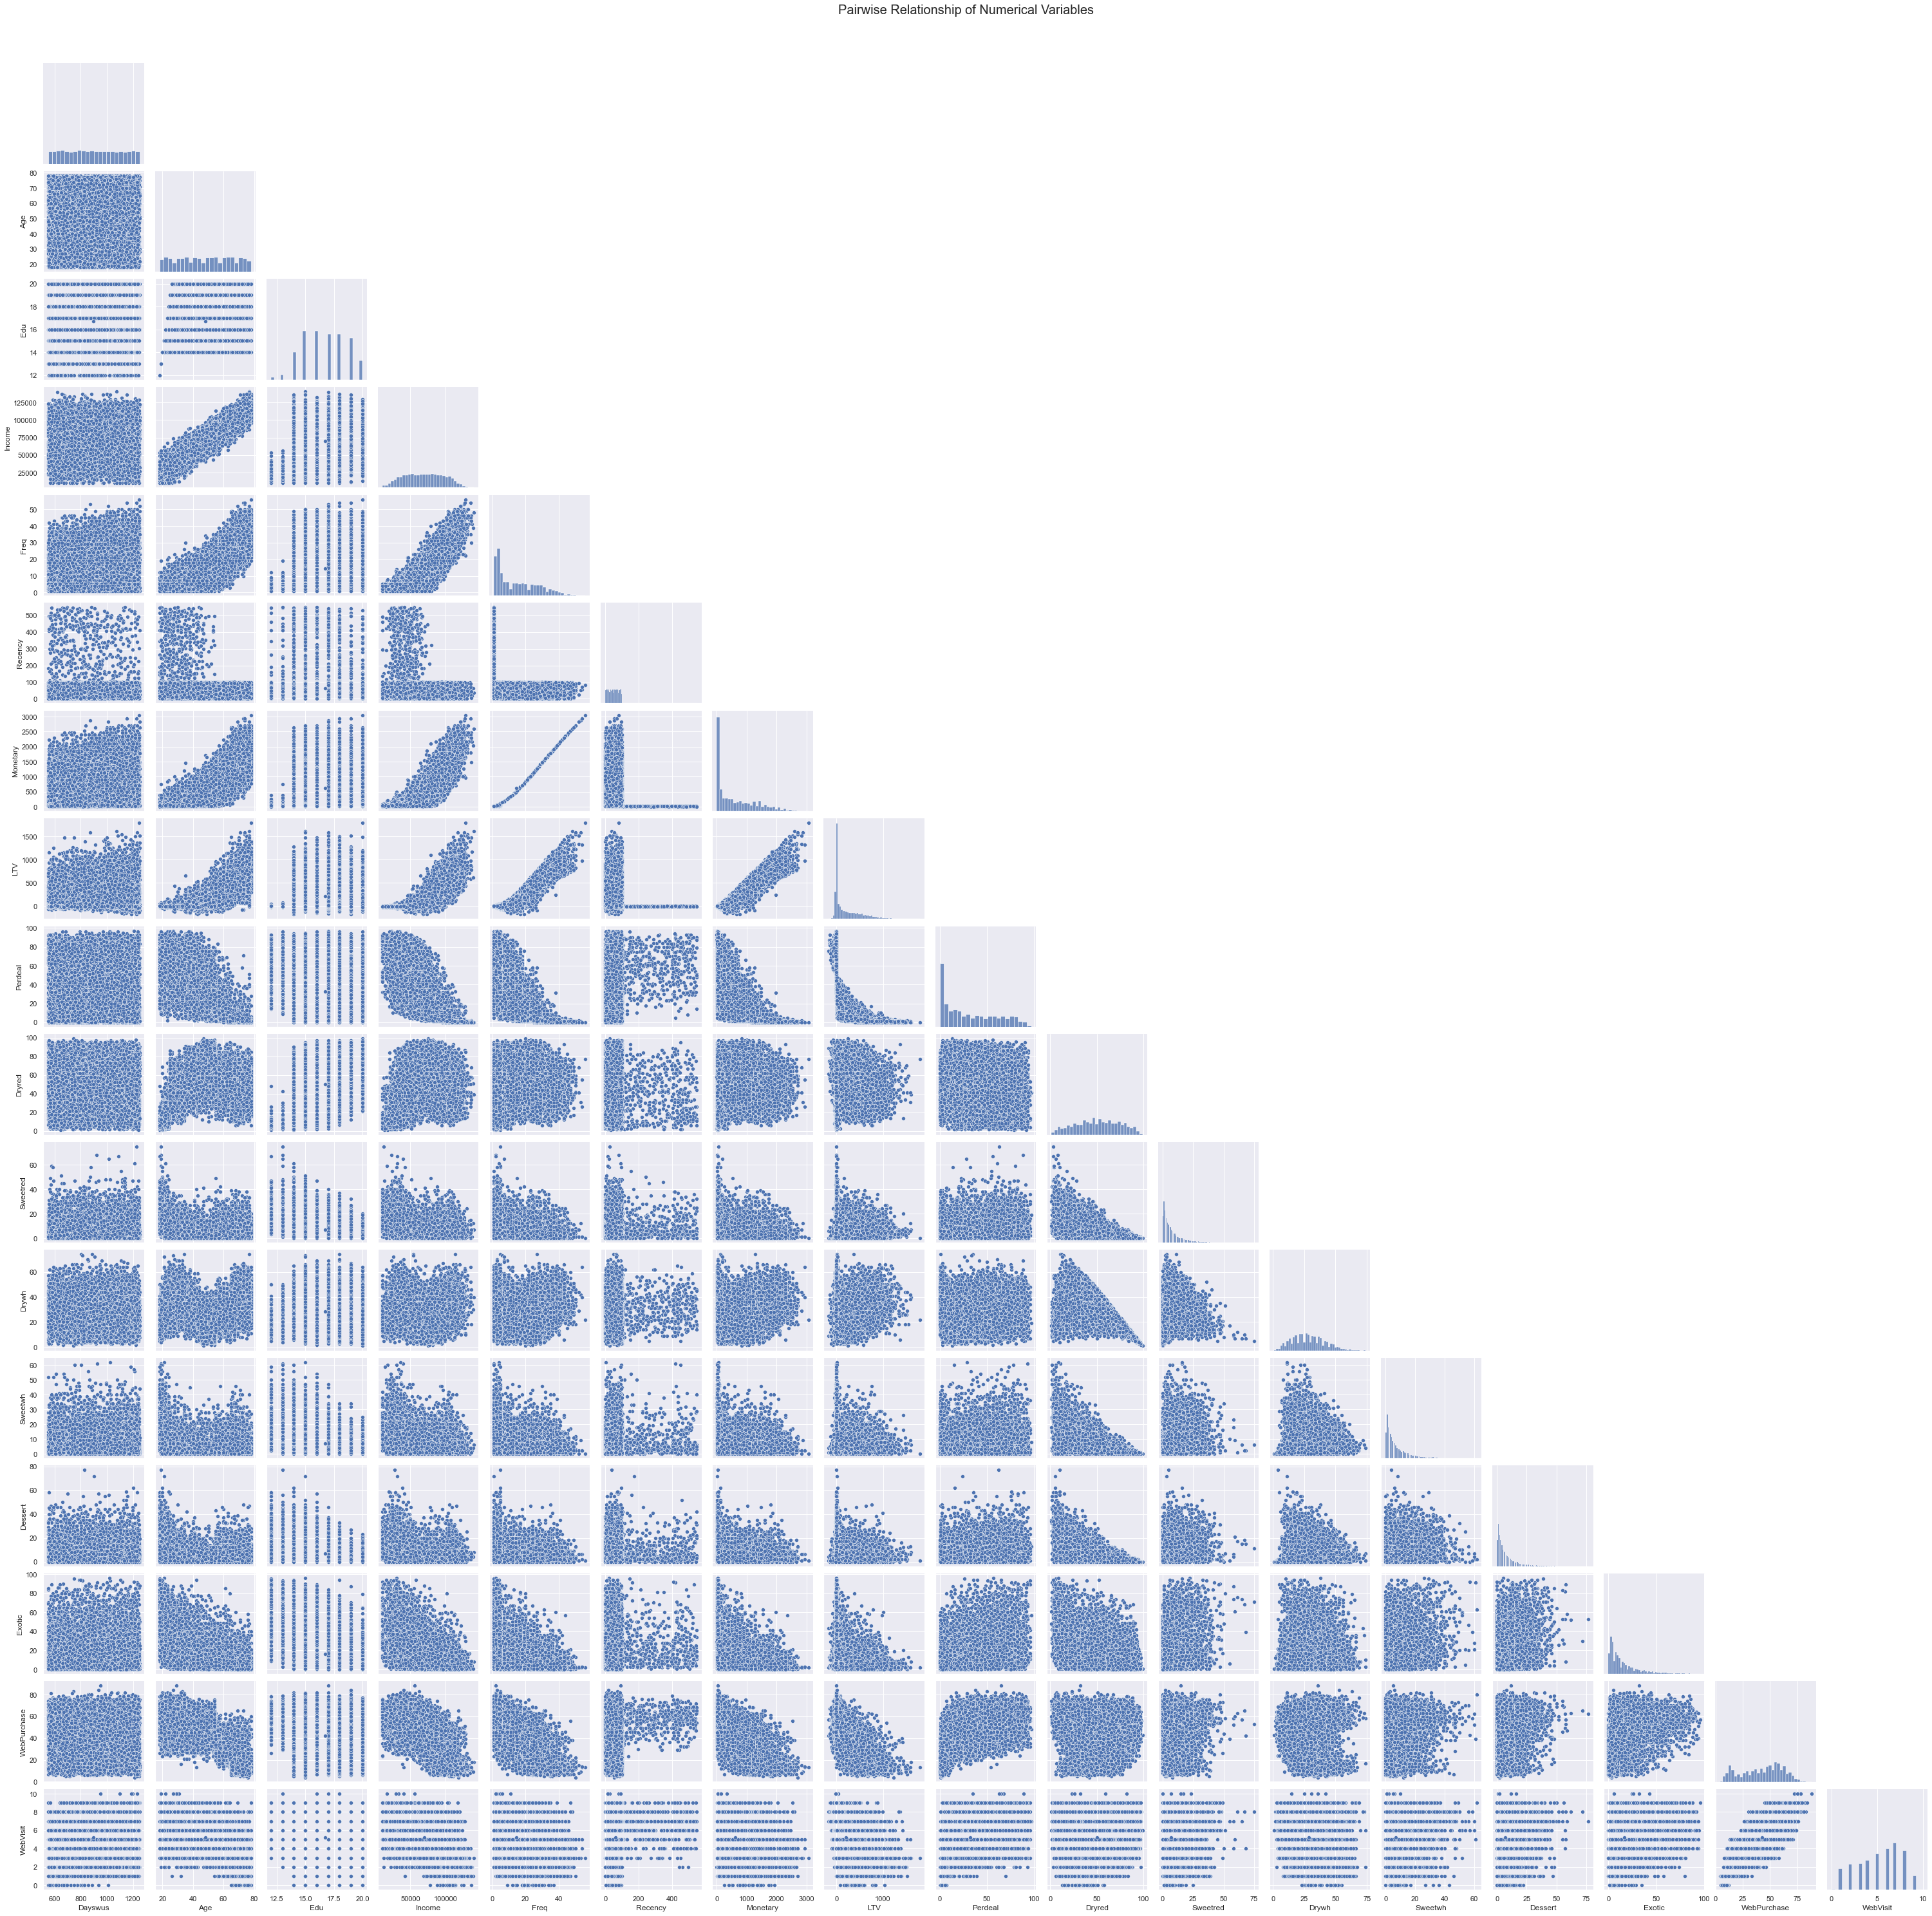

In [71]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df, diag_kind="hist", corner=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [80]:
#there were no duplicated observations. 
df.duplicated().unique()

array([False])

### Feature Engineering:

In [83]:
df.columns

Index(['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic', 'WebPurchase', 'WebVisit'],
      dtype='object')

In [127]:
#years as customer
df["YearsAsCustomer"]=round(df.Dayswus/365,1)

#income
df["logIncome"]=df["Income"].map(lambda x : 1 if x<=1 else x)
df["logIncome"]=np.log(df["logIncome"])

#LTV
df["logLTV"]=df["LTV"].map(lambda x : 1 if x<=1 else x)
df["logLTV"]=np.log(df["logLTV"])

In [128]:
#years as customer
df_out["YearsAsCustomer"]=round(df_out.Dayswus/365,1)

#income
df_out["logIncome"]=df_out["Income"].map(lambda x : 1 if x<=1 else x)
df_out["logIncome"]=np.log(df_out["logIncome"])

#LTV
df_out["logLTV"]=df_out["LTV"].map(lambda x : 1 if x<=1 else x)
df_out["logLTV"]=np.log(df_out["logLTV"])

## PCA

In [85]:
# Robust Scaler - Scale features using statistics that are robust to outliers.
robust = RobustScaler().fit(df)
df_norm = robust.transform(df)

# Convert the array to a pandas dataframe
df_norm = pd.DataFrame(df_norm, columns=df.columns).set_index(df.index)

In [97]:
df_pca = df_norm[['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal','WebPurchase', 'WebVisit', 'YearsAsCustomer', 'logIncome',
       'logLTV']].copy()

In [98]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
).round(4)

Eigenvalue  Difference  Proportion  Cumulative
1       3.1776      0.0000      0.4817      0.4817
2       1.5391     -1.6385      0.2333      0.7151
3       0.7946     -0.7445      0.1205      0.8355
4       0.3983     -0.3963      0.0604      0.8959
5       0.2380     -0.1603      0.0361      0.9320
6       0.2181     -0.0200      0.0331      0.9650
7       0.1172     -0.1008      0.0178      0.9828
8       0.0430     -0.0742      0.0065      0.9893
9       0.0321     -0.0109      0.0049      0.9942
10      0.0192     -0.0129      0.0029      0.9971
11      0.0115     -0.0077      0.0017      0.9989
12      0.0060     -0.0055      0.0009      0.9998
13      0.0010     -0.0050      0.0001      0.9999
14      0.0005     -0.0005      0.0001      1.0000

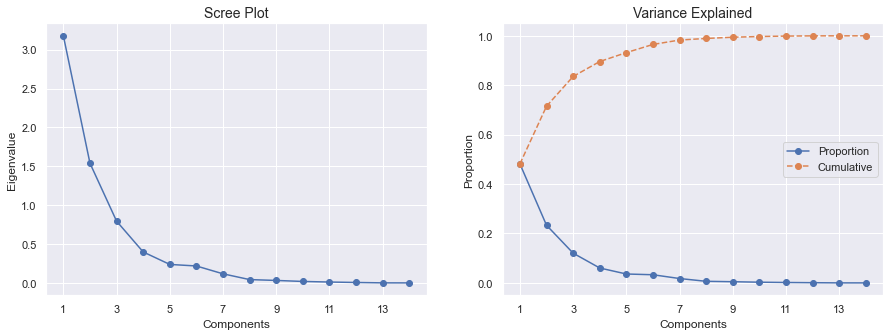

In [99]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

- the first two Coponents explain 70% of the variance
- the first four Components explain 90% of the variance

In [100]:
# testing PCA with the 4 principal components
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)
pca_df

PC0       PC1       PC2       PC3
0     1.192423 -0.520938 -0.940179 -0.879101
1     2.603452  0.030786  0.691237 -0.250649
2    -2.494983 -0.643833 -0.679103  1.597182
3    -1.291758 -0.624540  0.567118 -0.070560
4    -0.738166 -1.314740 -0.392995 -0.039754
...        ...       ...       ...       ...
9936  1.391263  0.073132 -1.462974  0.735699
9937 -1.649012 -0.268472 -1.125814  1.573649
9938 -2.687084  5.389537  0.942305  0.017639
9939  1.343795 -0.368761  0.351696  0.193810
9940  0.115093  0.048076  0.029016 -0.024016

[9941 rows x 4 columns]

In [101]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

Dayswus       Age       Edu    Income  Freq   Recency  Monetary       LTV  \
0 -0.688571  0.233333  1.000000  0.185938   0.4 -0.653846  0.434911  1.048913   
1  0.420000  0.900000  0.333333  0.787806   1.2 -0.365385  1.446746  1.304348   
2 -0.651429 -1.000000 -1.666667 -0.955856  -0.4  0.076923 -0.341223 -0.179348   
3  0.442857 -0.200000 -0.333333 -0.192293  -0.5 -0.115385 -0.343195 -0.176630   
4 -0.162857 -0.033333 -0.333333 -0.100907  -0.5 -0.942308 -0.344181 -0.149457   

   Perdeal  WebPurchase  WebVisit  YearsAsCustomer  logIncome    logLTV  \
0    -0.36    -0.300000     -0.25        -0.666667   0.169543  0.342311   
1    -0.46    -0.833333     -0.50         0.555556   0.616888  0.374778   
2     1.26     0.500000      0.50        -0.666667  -1.409957 -0.690800   
3     0.90     0.466667      0.25         0.555556  -0.197625 -0.690800   
4     0.20     0.600000      0.00        -0.111111  -0.100521 -0.455939   

        PC0       PC1       PC2       PC3  
0  1.192423 -0.520938 -0.940179 -0.879101  
1  2.603452  0.030786  0.691237 -0.250649  
2 -2.494983 -0.643833 -0.679103  1.597182  
3 -1.291758 -0.624540  0.567118 -0.070560  
4 -0.738166 -1.314740 -0.392995 -0.039754

In [102]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca.corr().loc[['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal','WebPurchase', 'WebVisit', 'YearsAsCustomer', 'logIncome',
       'logLTV'], pca_feat_names]
loadings.style.applymap(_color_red_or_green)

PCA0 is almost exlusively the combination of income/frequency/age/LTV, which all seem to have lots of overlap 
PCA1 is Recency, meaning we should probably include it in the clustering 
PCA2 is years as customer (40% webvisit) 
PCA3 is education
the rest are useless 

so given the PCA analysis and the correlation analysis we will try clustering with a combination of the following: 
- LTV/logLTV
- per deal
- recency 
- years as customer 
- education
- webvisit 

In [107]:
df.to_csv('cleaned_data.csv', index_label='Custid')

In [129]:
df_out.to_csv('outliers.csv', index_label='Custid')